<a href="https://colab.research.google.com/github/ThierrryScotto/natural_language_processing/blob/main/natural%20language%20processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4 as bs         # leitura e processamento de dados da web
import urllib.request    # lib para fazer requisições
import nltk              # modelo
import spacy             # modelo

In [ ]:
!python3 -m spacy download pt # baixar a versão em portugues do modelo

     |████████████████████████████████| 21.2 MB 11.9 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=60da5712bfb71d33630721ca32faa95dc1fbafb9ff76453d79da624c142942e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lrqrkh6s/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguegem natural, curso em Curituba')

In [ ]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguegem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curituba PROPN


## Lematização e stemização

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguegem linguegem
natural natural
, ,
curso cursar
em em
Curituba Curituba


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [ ]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
# Extrair o radical das palavras

stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguegem linguegem lingueg
natural natural natur
, , ,
curso cursar curs
em em em
Curituba Curituba curitub


## Carregamento dos textos

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"fe4f9c52-ea8d-4aac-b39c-05b56af008cd","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"fe4f9c52-ea8d-4aac-b39c-05b56af008cd","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":62586855,"wgRevisionId":62586855,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

105

In [ ]:
paragrafos[0]

<p>
		Páginas para editores conectados <a aria-label="Saiba mais sobre edição" href="/wiki/Wikip%C3%A9dia:Boas-vindas"><span>saiba mais</span></a>
</p>

In [ ]:
paragrafos[1]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.<sup class="reference" i

In [ ]:
paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [ ]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

**Buscas de textos com spaCy**

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
string = 'turing'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
# classe para fazer busca em textos
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [ ]:
doc[3044:3045]

turing

In [ ]:
doc[9009:9010]

turing

In [ ]:
# retorna as cinco palavras antes e depos da palavra
doc[3044-5:3045+5]

uma contribuição prática de alan turing foi o que se chamou

In [ ]:
# usada para usar código html dentro do python
from IPython.core.display import HTML

texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)} </p>"""))

for i in matches:
  inicio = i[1] - numero_palavras

  if inicio < 0:
    inicio = 0

  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br/> </br/>"
display(HTML(f"""... {texto} ..."""))
   

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [ ]:
# Ferramenta visual
from spacy import displacy

displacy.render(doc, style = 'ent', jupyter=True)

## Nuvem de palavras e stop words

In [ ]:
# removendo stop words
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'fazes', 'conselho', 'fui', 'quatro', 'outros', 'tente', 'sou', 'estar', 'inicio', 'puderam', 'dezassete', 'esse', 'pelo', 'tive', 'dão', 'eu', 'quem', 'vários', 'cima', 'daquela', 'dezoito', 'deve', 'fazia', 'tens', 'sei', 'então', 'valor', 'põem', 'fazer', 'duas', 'mal', 'todas', 'tuas', 'em', 'tentar', 'são', 'depois', 'aquelas', 'deverá', 'cedo', 'grandes', 'posso', 'onde', 'nossa', 'meio', 'nunca', 'ademais', 'nossas', 'menor', 'à', 'sempre', 'logo', 'tivestes', 'essas', 'às', 'pois', 'ali', 'segunda', 'lado', 'és', 'algo', 'nada', 'estiveste', 'tenho', 'nenhuma', 'nós', 'vem', 'você', 'irá', 'quais', 'aí', 'no', 'também', 'ir', 'vinte', 'nível', 'tanto', 'algumas', 'da', 'aquele', 'pôde', 'vais', 'faz', 'apoia', 'enquanto', 'conhecida', 'novas', 'elas', 'quando', 'agora', 'estava', 'lhe', 'quinze', 'ainda', 'mês', 'outras', 'seus', 'tem', 'teve', 'umas', 'estes', 'minhas', 'naquele', 'tipo', 'tarde', 'nas', 'dar', 'até', 'uma', 'pouca', 'ela', 'mesmo', 'quarto', 'cada', 'certame

In [ ]:
len(STOP_WORDS)

413

In [ ]:
pln.vocab['caminhar'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []

for token in doc:
  lista_token.append(token.text)

In [ ]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'inteligência', 'artificial', '(', 'por', 'vezes', 'mencionada', 'pela', 'sigla', 'em', 'português', 'ia', 'ou', 'pela', 'sigla', 'em', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'é', 'a', 'inteligência', 'similar', 'à', 'humana', 'exibida', 'por', 'sistemas', 'de', 'software', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico', '.', 'os', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', 'como', '"', 'o', 'estudo', 'e', 'projeto', 'de', 'agentes', 'inteligentes', '"', ',', 'onde', 'um', 'agente', 'inteligente', 'é', 'um', 'sistema', 'que', 'percebe', 'seu', 'ambiente', 'e', 'toma', 'atitudes', 'que', 'maximizam', 'suas', 'chances', 'de', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', 'como', '“', 'uma', 'capacidade', 'do', 'sistema', 'para', 'interpretar', 'corretamente'

In [ ]:
len(lista_token)

9939

In [ ]:
# removendo as stop words

sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n', 'inteligência', 'artificial', '(', 'mencionada', 'sigla', 'português', 'ia', 'sigla', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'a', 'inteligência', 'similar', 'humana', 'exibida', 'sistemas', 'software', ',', 'campo', 'estudo', 'acadêmico', '.', 'principais', 'pesquisadores', 'e', 'livros', 'didáticos', 'definem', 'o', 'campo', '"', 'o', 'estudo', 'e', 'projeto', 'agentes', 'inteligentes', '"', ',', 'agente', 'inteligente', 'percebe', 'ambiente', 'e', 'toma', 'atitudes', 'maximizam', 'chances', 'sucesso', '.', 'andreas', 'kaplan', 'e', 'michael', 'haenlein', 'definem', 'a', 'inteligência', 'artificial', '“', 'capacidade', 'interpretar', 'corretamente', 'dados', 'externos', ',', 'aprender', 'a', 'd', 'dados', 'e', 'utilizar', 'aprendizagens', 'atingir', 'objetivos', 'e', 'tarefas', 'específicas', 'adaptação', 'flexível”.[1', ']', 'john', 'mccarthy', ',', 'cunhou', 'o', 'termo', '1956', '(', '"', 'conferência',

In [ ]:
len(sem_stop)

6602

In [ ]:
from matplotlib.colors import ListedColormap

color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

<function matplotlib.pyplot.show>

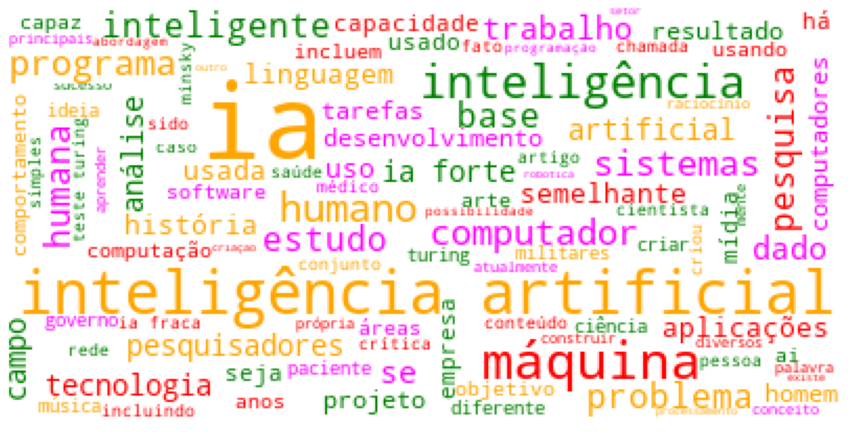

In [ ]:
import matplotlib.pyplot as plt

# com stop words
# cloud = cloud.generate(conteudo)

# sem stop words
cloud = cloud.generate(' '.join(sem_stop))

plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show